In [54]:
import analyze_rnn_predictions

In [55]:
#To access gym
import sys
sys.path.append('/home/kaiolae/.virtualenvs/worldmodels/lib/python3.5/site-packages')

In [56]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 2.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    #fig = plt.figure(figsize=(1,1), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [57]:
from collections import namedtuple

#Loading RNNs to analyze
rnn1_analyzer = analyze_rnn_predictions.RNNAnalyzer("tf_rnn_1mixtures", 1, 0.5)
rnn16_analyzer = analyze_rnn_predictions.RNNAnalyzer("tf_rnn_16mixtures", 16, 0.5)

INFO:tensorflow:Model using cpu.
model using cpu
input dropout mode = False
output dropout mode = False
recurrent dropout mode = False
INFO:tensorflow:Model using cpu.
model using cpu
input dropout mode = False
output dropout mode = False
recurrent dropout mode = False


In [58]:
#Get a start video
#Getting data to feed into the VAE and RNN
import numpy as np
import os
# load preprocessed data
raw_data = np.load(os.path.join("series", "series.npz"))
raw_data_mu = raw_data["mu"]
raw_data_logvar = raw_data["logvar"]
raw_data_action =  raw_data["action"]

single_action_sequence = raw_data_action[16]
single_latent_sequence = raw_data_mu[16]
print("Actions length: ", len(single_action_sequence))
print("Latent vectors length: ", len(single_latent_sequence))
num_frames = len(single_latent_sequence)



#Decode all 100 vectors, store as video
#Visualize video.

Actions length:  177
Latent vectors length:  177


In [59]:
#Decode a sequence with the VAE and visualize it
def decode_and_visualize(latent_vector_sequence, rnn_analyzer):
    plot_movie_mp4(rnn_analyzer.decode_with_vae(latent_vector_sequence))

### Visualizing one sequence of latent vectors from the training data

In [60]:
#From the actual sampled images. All loss here is due to VAE.
decode_and_visualize(single_latent_sequence, rnn1_analyzer)

<Figure size 64x64 with 0 Axes>

In [61]:
#Generating a dream.
action = 0 #Consider random action. Or, when predicting step by step, use the actual action
dreamed_zs1 = []
dreamed_z = rnn1_analyzer.predict_one_step(action, previous_z=single_latent_sequence[0])
dreamed_zs1.append(dreamed_z)
for i in range(100):
    dreamed_zs1.append(rnn1_analyzer.predict_one_step(action))
    

In [62]:
#Visualizing the dream
decode_and_visualize(dreamed_zs1, rnn1_analyzer)

<Figure size 64x64 with 0 Axes>

In [63]:
#Generating a dream with 16 mixtures
action = 0 #Consider random action. Or, when predicting step by step, use the actual action
dreamed_zs16 = []
dreamed_z = rnn16_analyzer.predict_one_step(action, previous_z=single_latent_sequence[0])
dreamed_zs16.append(dreamed_z)
for i in range(100):
    dreamed_zs16.append(rnn16_analyzer.predict_one_step(action))
#Visualizing the dream
decode_and_visualize(dreamed_zs16, rnn16_analyzer)

<Figure size 64x64 with 0 Axes>

0 :  0
1 :  0
2 :  0
3 :  0
4 :  0
5 :  0
6 :  0
7 :  0
8 :  0
9 :  0
10 :  0
11 :  0
12 :  0
13 :  0
14 :  0
15 :  0
16 :  0
17 :  0
18 :  0
19 :  0
20 :  0
21 :  0
22 :  0
23 :  0
24 :  0
25 :  0
26 :  0
27 :  0
28 :  0
29 :  0
30 :  0
31 :  0
32 :  0
33 :  0
34 :  0
35 :  0
36 :  0
37 :  0
38 :  0
39 :  0
40 :  0
41 :  0
42 :  0
43 :  0
44 :  0
45 :  0
46 :  0
47 :  0
48 :  0
49 :  0
50 :  0
51 :  0
52 :  0
53 :  0
54 :  0
55 :  0
56 :  0
57 :  0
58 :  0
59 :  0
60 :  0
61 :  0
62 :  0
63 :  0
64 :  0
65 :  1
66 :  1
67 :  1
68 :  1
69 :  1
70 :  1
71 :  1
72 :  1
73 :  1
74 :  1
75 :  1
76 :  1
77 :  1
78 :  1
79 :  1
80 :  1
81 :  1
82 :  1
83 :  1
84 :  1
85 :  1
86 :  1
87 :  1
88 :  2
89 :  1
90 :  2
91 :  2
92 :  2
93 :  2
94 :  2
95 :  2
96 :  2
97 :  2
98 :  2
99 :  2
Predicted fireballs:  46
Imagined monsters:  23
Imagined fireballs:  23
missing monsters:  105
Missing fireballs:  25


[]

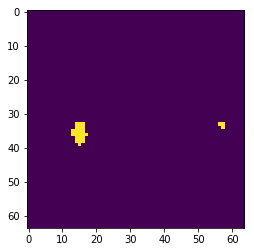

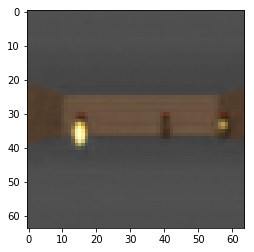

In [64]:
#Measuring creativity: Difference in presence of monsters, fireballs, etc.
FIREBALL_THRESHOLD = 0.5
predicted_images = rnn1_analyzer.vae.decode(dreamed_zs1)
real_images =  rnn1_analyzer.vae.decode(single_latent_sequence)
thresholded_images = [] #For sanity checks

from count_monsters_and_balls import count_monsters, count_fireballs
missing_monsters = 0
missing_fireballs = 0
imagined_monsters = 0
imagined_fireballs = 0
predicted_fireballs = 0
for i in range(100):
    actual_num_fireballs, img = count_fireballs(real_images[i+1], FIREBALL_THRESHOLD)
    predicted_num_fireballs, thresholded_image = count_fireballs(predicted_images[i],FIREBALL_THRESHOLD)
    thresholded_images.append(thresholded_image)
    print(i, ": ", predicted_num_fireballs)
    
    
    predicted_fireballs+=predicted_num_fireballs
    if actual_num_fireballs>predicted_num_fireballs:
        missing_fireballs+=actual_num_fireballs-predicted_num_fireballs
    elif predicted_num_fireballs>actual_num_fireballs:
        imagined_fireballs+=predicted_num_fireballs-actual_num_fireballs    
    
    actual_num_monsters, img = count_monsters(real_images[i+1])
    predicted_num_monsters,img = count_monsters(predicted_images[i])
    if actual_num_monsters>predicted_num_monsters:
        missing_monsters+=actual_num_monsters-predicted_num_monsters
    elif predicted_num_monsters>actual_num_monsters:
        imagined_monsters+=predicted_num_monsters-actual_num_monsters  

print("Predicted fireballs: ", predicted_fireballs)
print("Imagined monsters: ", imagined_monsters)
print("Imagined fireballs: ", imagined_fireballs)
print("missing monsters: ", missing_monsters)
print("Missing fireballs: ", missing_fireballs)

plt.imshow(thresholded_images[94])
plt.plot()
plt.figure()
plt.imshow(predicted_images[94])
plt.plot()

In [65]:
#Measuring creativity: Difference in presence of monsters, fireballs, etc.
predicted_images = rnn16_analyzer.vae.decode(dreamed_zs16)
real_images = rnn16_analyzer.vae.decode(single_latent_sequence)

from count_monsters_and_balls import count_monsters, count_fireballs
missing_monsters = 0
missing_fireballs = 0
imagined_monsters = 0
imagined_fireballs = 0
predicted_fireballs = 0
for i in range(100):
    actual_num_fireballs, img = count_fireballs(real_images[i+1], FIREBALL_THRESHOLD)
    predicted_num_fireballs, img = count_fireballs(predicted_images[i], FIREBALL_THRESHOLD)
    predicted_fireballs+=predicted_num_fireballs
    if actual_num_fireballs>predicted_num_fireballs:
        missing_fireballs+=actual_num_fireballs-predicted_num_fireballs
    elif predicted_num_fireballs>actual_num_fireballs:
        imagined_fireballs+=predicted_num_fireballs-actual_num_fireballs    
    
    actual_num_monsters, img = count_monsters(real_images[i+1])
    predicted_num_monsters, img = count_monsters(predicted_images[i])
    if actual_num_monsters>predicted_num_monsters:
        missing_monsters+=actual_num_monsters-predicted_num_monsters
    elif predicted_num_monsters>actual_num_monsters:
        imagined_monsters+=predicted_num_monsters-actual_num_monsters  

print("Predicted fireballs: ", predicted_fireballs)
print("Imagined monsters: ", imagined_monsters)
print("Imagined fireballs: ", imagined_fireballs)
print("missing monsters: ", missing_monsters)
print("Missing fireballs: ", missing_fireballs)

Predicted fireballs:  1
Imagined monsters:  25
Imagined fireballs:  1
missing monsters:  117
Missing fireballs:  48


# 